In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as sc

In [4]:
def recip(x, y, L, ita, K):
    dk = 2 * np.pi / L
    u1 = 0
    u2 = 0
    for i in range(K):
        for j in range(K):
            if i == 0 and j == 0:
                continue
            kx = dk * i
            ky = dk * j
            k2 = kx**2 + ky**2
            factor = np.exp(-k2 / (4 * ita**2)) / k2
            kr = kx * x + ky * y
            u1 += factor * kx * np.sin(kr)
            u2 += factor * ky * np.sin(kr)
    return u1, u2

In [32]:
u1, u2 = [], []
L = 300
ita = 6 / L
for K in range(50):
    a, b = recip(100, 100, L, ita, K)
    u1.append(a)
    u2.append(b)
    

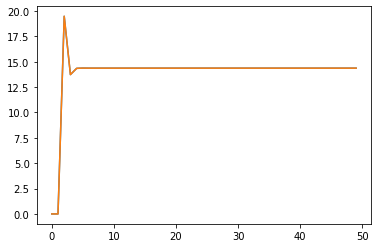

In [33]:
plt.plot(u1)
plt.plot(u2)

In [39]:
L = 200
ita = 6 / L
u = np.zeros((L, L, 2))
x0 = L//2
y0 = L//2
for i in range(L):
    for j in range(L):

        x = i - x0
        y = j - y0
        r2 = x**2 + y**2
        if r2 == 0:
            continue
        rec1, rec2 = recip(x, y, L, ita, 10)
        u1 = (x / r2 * np.exp(-ita**2 * r2)) + 2 * np.pi / L**2 * rec1
        u2 = (y / r2 * np.exp(-ita**2 * r2)) + 2 * np.pi / L**2 * rec2
        u[i, j] = [u1, u2]

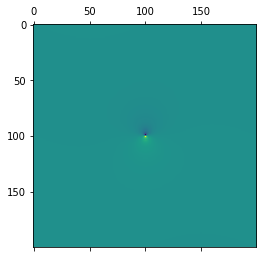

In [40]:
plt.matshow(u[:, :, 0])

In [49]:
r = []
ux = []

for i in range(L):
    x = i - x0
    if x  == 0:
        continue
    r.append(np.abs(x))
    ux.append(np.abs(u[i, y0, 0]))


In [50]:
r = []

uy = []
for j in range(L):
    y = j - y0
    if y  == 0:
        continue
    r.append(np.abs(y))
    uy.append(np.abs(u[x0, j, 1]))

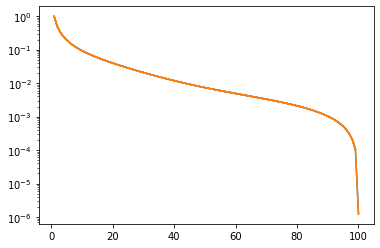

In [51]:
plt.plot(r, ux)
plt.plot(r, uy)
plt.yscale('log')